In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv ('C:/Users/jidax/Desktop/Data Project/Data Prep/traffic_accidents.csv')

In [37]:
df['crash_date'] = pd.to_datetime(df['crash_date'], format='%m/%d/%Y %H:%M')
df["crash_day_of_week"]=df["crash_date"].dt.day_name()
df["crash_month"] = df["crash_date"].dt.month_name()
df["crash_hour"] = df["crash_date"].dt.hour

day_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [43]:
order_dict={
    "crash_day_of_week": day_order,
    "crash_month": month_order,
    "crash_hour": range(24)
}

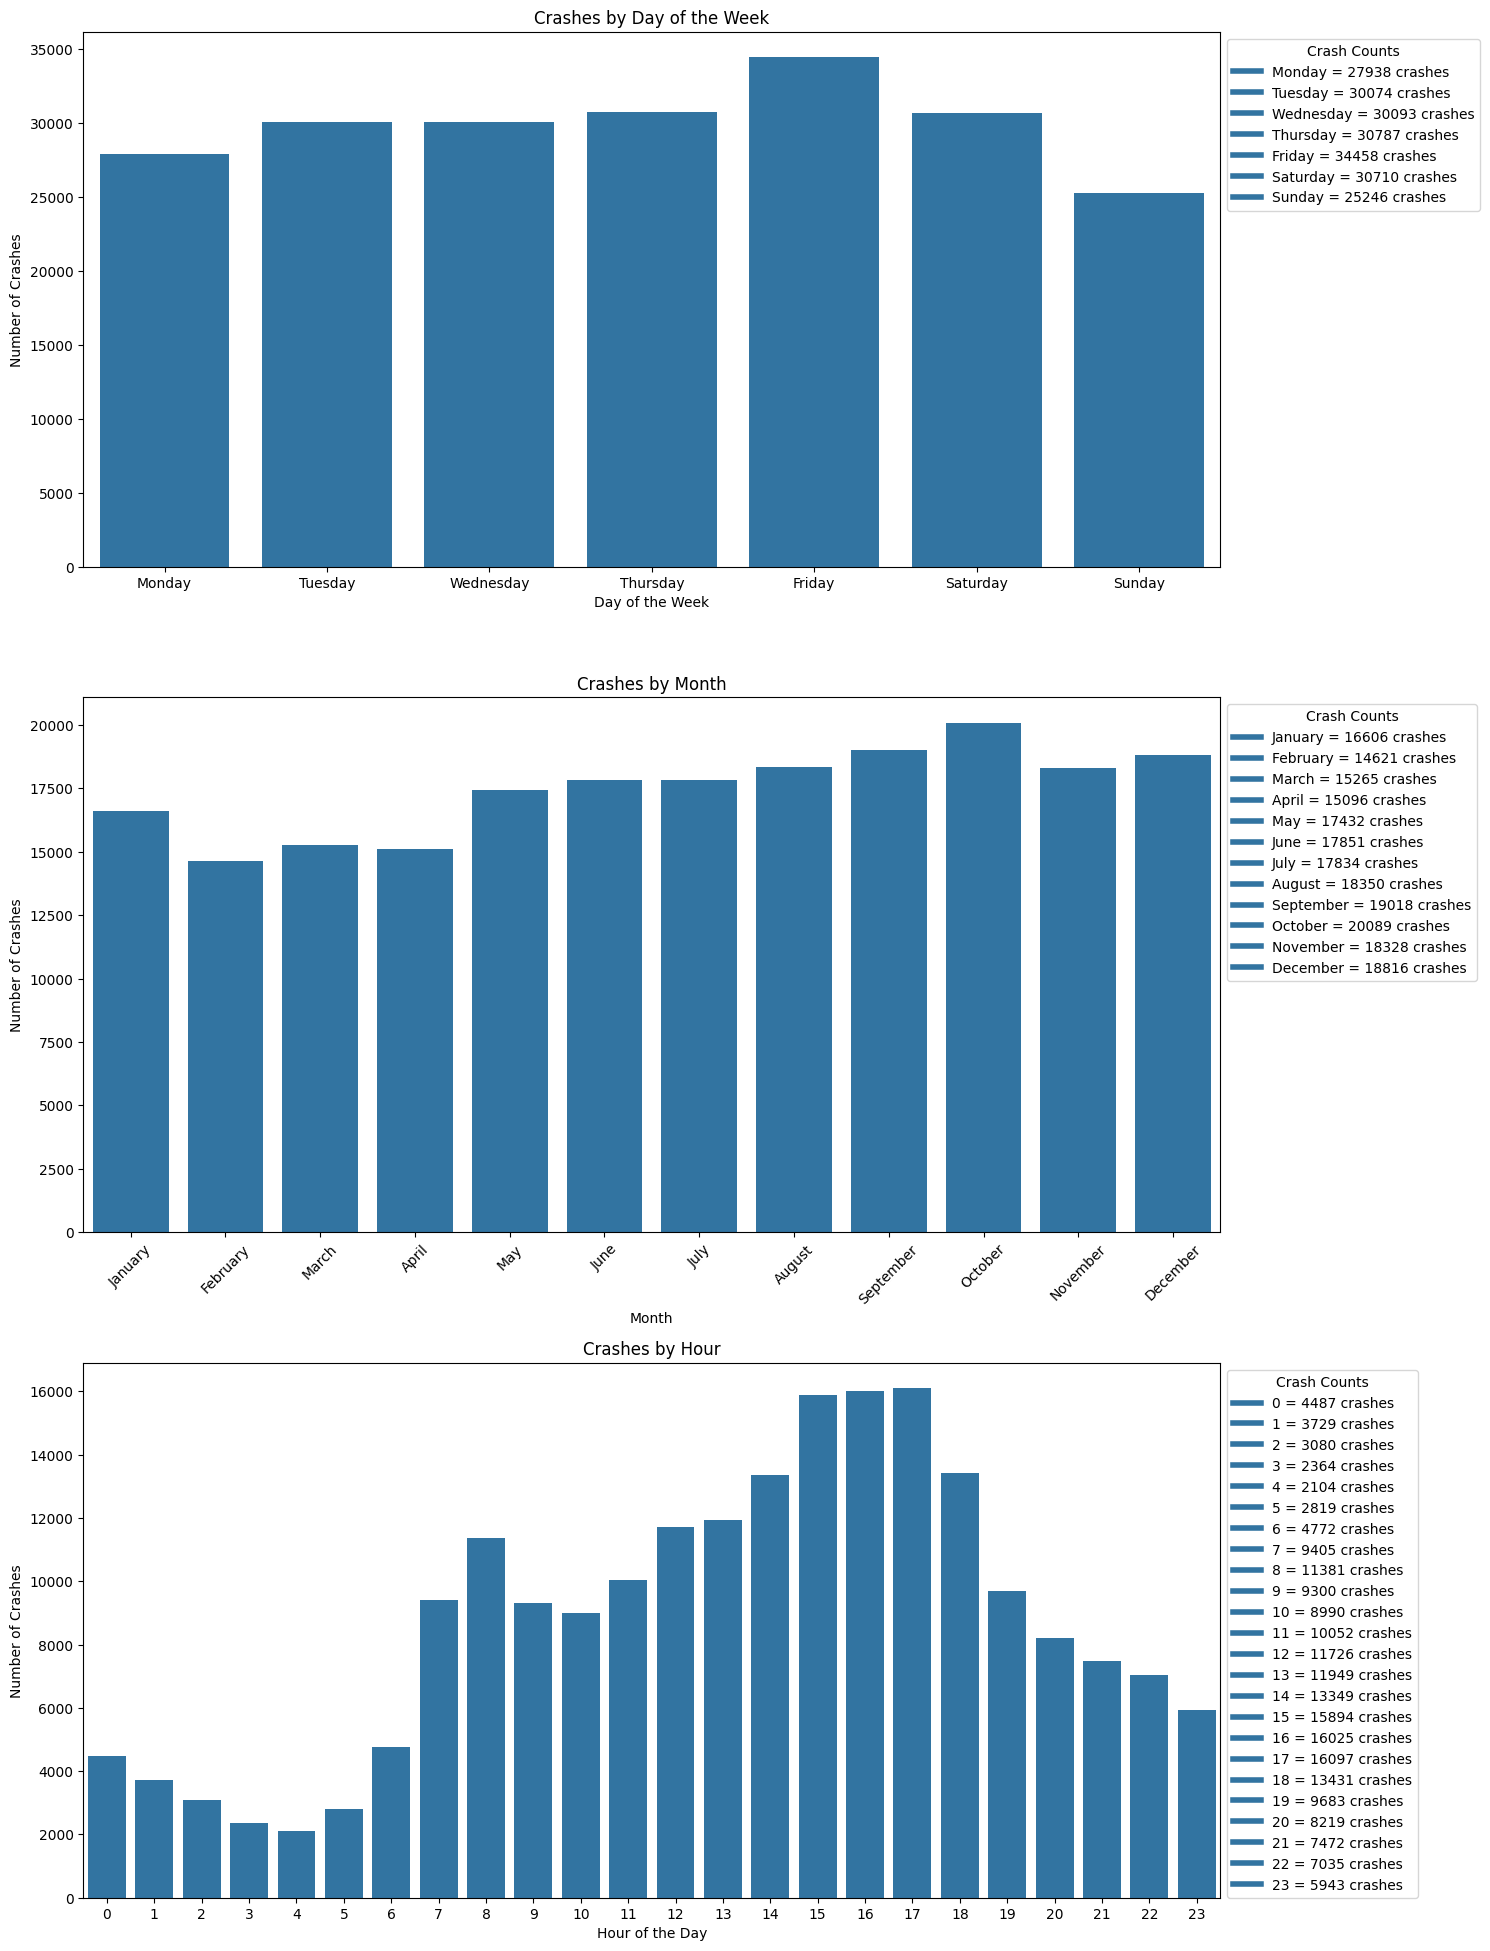

In [67]:
date = ["crash_day_of_week", "crash_month", "crash_hour"]
titles = ["Crashes by Day of the Week", "Crashes by Month", "Crashes by Hour"]
x_labels = ["Day of the Week", "Month", "Hour of the Day"]
y_label = "Number of Crashes"

plt.figure(figsize=(15, 20))
for i, col in enumerate(date):
    plt.subplot(3, 1, i + 1)
    ax = sns.countplot(data=df, x=col, order=order_dict[col])
    plt.title(titles[i])
    plt.xlabel(x_labels[i])
    plt.ylabel(y_label)

    counts = df[col].value_counts().reindex(order_dict[col])
    labels = [f"{category} = {count} crashes" for category, count in counts.items()]
    handles = [plt.Line2D([0], [0], color=bar.get_facecolor(), lw=4) for bar in ax.patches]
    
    plt.legend(handles, labels, title="Crash Counts", loc='upper left', bbox_to_anchor=(1, 1))

    if col == "crash_month":
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()